In [1]:
import random
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def rotate(image, angle=50):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    angle = angle
    rot_mat = cv.getRotationMatrix2D(center, angle,1)

    warp_rotate_dst = cv.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]))
    cv.imshow('Warp + Rotate', warp_rotate_dst)
    cv.waitKey()
    return warp_rotate_dst

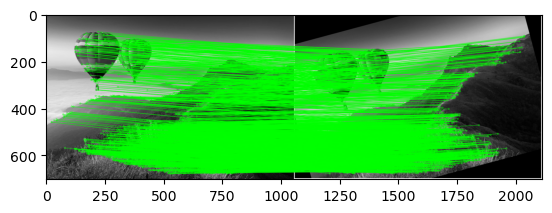

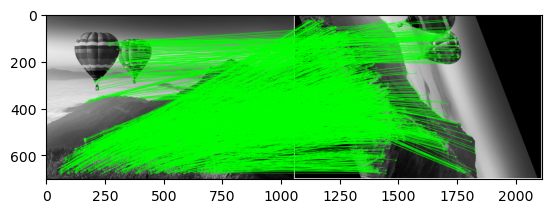

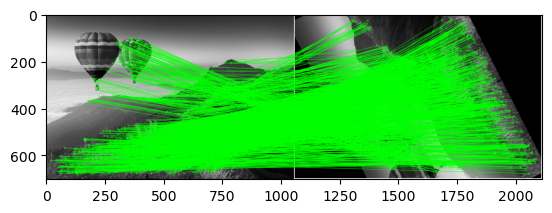

In [4]:
img = cv.imread('sc.png')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
for i in range(3):
    angle= random.randrange(0,360,1)
    ro_gray= rotate(gray, angle)

    # Initiate SIFT detector and FREAK
    detector_freak=cv.xfeatures2d.FREAK_create()
    kp_detector_sift=cv.SIFT_create()

    # find the keypoints with sift  and descriptors with FREAK
    kp1= kp_detector_sift.detect(gray,None)
    kp1, des1=detector_freak.compute(gray,kp1)
    kp2 = kp_detector_sift.detect(ro_gray,None)
    kp2, des2=detector_freak.compute(ro_gray,kp2)


    bf = cv.BFMatcher(cv.NORM_HAMMING)
    matches = bf.match(des1, des2)

    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    M, mask = cv.findHomography(dst_pts,src_pts , cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)

    img111= cv.warpPerspective(ro_gray,M, (img.shape[1], img.shape[0]))
    img2 = cv.polylines(ro_gray,[np.int32(pts)],True,255,3, cv.LINE_AA)
    cv.imshow('changed', img111)
    cv.waitKey()
    
    # draw matches in green color
    draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   # draw only inliers
                   matchesMask = matchesMask, 
                   flags = 2)
    img3 = cv.drawMatches(gray,kp1,ro_gray,kp2,matches,None,**draw_params)
    plt.imshow(img3, 'gray'),plt.show()